# **SyriaTel Customer Churn Prediction**

## **1.0 Business Understanding**

### **1.1 Introduction: Understanding Customer Churn in the Telcommunications Industry**

### **1.2 Problem Statement**

### **1.3 Objectives**

## **2.0 Data Understanding**

The [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) contains information about whether or not a customer churned from the SyriaTel firm based on certain features in the dataset. Using this dataset, we are able to develop predictive models that help SyriaTel determine whether a customer will abandon their services based on the information provided by the customer. 

The dataset contains 3333 rows and 21 columns, with each column representing the following:
- **State:** Represents the U.S. state where the customer resides represented by a two-letter code.
- **Account Length:** The number of days the customer has had an account.
- **Area Code:** The area code of the customer’s phone number, which often indicates the geographic region.
- **Phone Number:** The customer’s phone number, typically used as a unique identifier for each customer.
- **Internation Plan:** Indicates whether the customer has an international calling plan.
- **Voice Mail Plan:** Indicates whether the customer has a voice mail plan.
otherwise false.
- **Number Vmail Messages:** The number of voicemails the customer has sent.
- **Total Day Minutes:** Total number of minutes the customer has been in calls during the day.
- **Total Day Calls:** Total number of calls the user has done during the day.
- **Total Day Charge:** Total amount of money the customer was charged by the Telecom company for calls during the day.
- **Total Eve Minutes:** Total minutes of calls made by the customer during the evening.
- **Total Eve Calls:** Total number of calls the customer has done during the evening.
- **Total Eve Charge:** Total amount of money the customer was charged by the Telecom company for calls during the evening.
- **Total Night Minutes:** Total minutes of calls made by the customer during the night.
- **Total Night Calls:** Total number of calls the customer has done during the night.
- **Total Night Charge:** Total amount of money the customer was charged by the Telecom company for calls during the night.
- **Total Intl Minutes:** Total number of minutes the user has been in international calls.
- **Total Intl Calls:** Total number of international calls the customer has done.
- **Total Intl Charge:** Total amount of money the customer was charged by the Telecom company for international calls.
- **Customer Service Calls:** Number of calls the customer has made to customer service.
- **Churn:** Indicates whether a customer has terminated their contract.


### **2.1 Load and Explore the Dataset**

In [22]:
# Importing the relevant libaries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [3]:
# Reading the dataset and displaying the first 10 rows
telcom_data = pd.read_csv('data/telcom_churn.csv')
telcom_data.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [4]:
# Display basic information about the dataset
telcom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3333 entries with 21 columns with 16 numerical columns and 5 categorical columns. The phone number column is indicated as a categorical columnn therefore we should expect no duplicate entries per phone number. The international plan and voice mail plan columns are represented as yes and no and will therefore need to be encoded to the relevant values. The churn column should also be turned into an integer column. The column names should also be changed by removing the whitespaces.

In [5]:
# Display a summary of numerical columns in the dataset
telcom_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# Display a summary of categorical columns in the dataset
telcom_data.describe(include='object')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,399-6642,no,no
freq,106,1,3010,2411


There seems to be a majority of customers from West Virginia (WV). Majority of customers do not have an international plan or a voice plan.

In [7]:
# Check value counts of the categorical columns
categorical_columns = telcom_data.select_dtypes(include=['object', 'category','bool']).columns

for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(telcom_data[column].value_counts())
    print()

Value counts for state:
WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     68
NV     66
CO     66
WA     66
RI     65
MS     65
MA     65
AZ     64
MO     63
FL     63
ND     62
ME     62
NM     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

Value counts for phone number:
399-6642    1
337-7739    1
405-7119    1
415-3537    1
411-7778    1
           ..
338-7120    1
402-6744    1
397-6542    1
401-7334    1
342-8348    1
Name: phone number, Length: 3333, dtype: int64

Value counts for international plan:
no     3010
yes     323
Name: international plan, dtype: int64

Value counts for voice mail plan:
no     2411
yes     922
Name: voice mail plan, dtype: int64

Value coun

We can keep the state column to see how many customers churn by state. The internation plan, voice mail plan and churn columns all contain unique values i.e yes or no, True or false and no other values. There is a class imbalance in the churn class that needs to be addressed during pre-processing.

In [8]:
# Looking at the value counts of some additional columns
print(telcom_data['area code'].value_counts())
print(telcom_data['number vmail messages'].value_counts())
print(telcom_data['customer service calls'].value_counts())

415    1655
510     840
408     838
Name: area code, dtype: int64
0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: number vmail messages, dtype: int64
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64


These columns do not contain any unique values that would need to be removed. The area code column has 3 unique area codes as per our dataset. Additionally when it comes to duplicates, many customers can for instance have placed the same number of customer service calls.

### **2.2 Initial Data Cleaning**

In [9]:
# Removing whitespaces from column names
telcom_data.columns = telcom_data.columns.str.replace(' ','_')
telcom_data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [10]:
# Remove the hyphen in the phone number column
telcom_data['phone_number'] = telcom_data['phone_number'].str.replace('-', '')

We remove the hyphen from the phone_number column to ensure uniformity in our dataset.

In [11]:
# Check for missing values in the dataset
telcom_data.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

The dataset is not missing any values as also indicated in our inital dataset summary.

In [12]:
# Check if the dataset has any duplicate values
telcom_data.duplicated().sum()

0

There are no duplicated rows. However let us check if there are any duplicated values for the phone number column which should be unique for every customer.

In [13]:
# Check if there are any duplicated values per phone number
telcom_data['phone_number'].duplicated().sum()

0

There are no duplicated columns per phone number and since our phone number is a unique column identifying a customer in our dataset, we can set this column as the index of our dataset.

In [14]:
# Setting the phone number as our index
telcom_data.set_index('phone_number', inplace=True)

In [15]:
# Final look at our dataset before analysis
telcom_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
phone_number,,,,,,,,,,,,,,,,,,,,
3824657,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
3717191,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
3581921,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3759999,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
3306626,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## **3.0 Exploratory Data Analysis (EDA)**

### **3.1 Univariate Analysis**

In [41]:
# Identify numerical and categorical columns
numerical_columns = telcom_data.select_dtypes(include=['number']).columns
categorical_columns = telcom_data.select_dtypes(include=['object', 'category','bool']).columns
categorical_columns = [col for col in categorical_columns if col != 'churn']

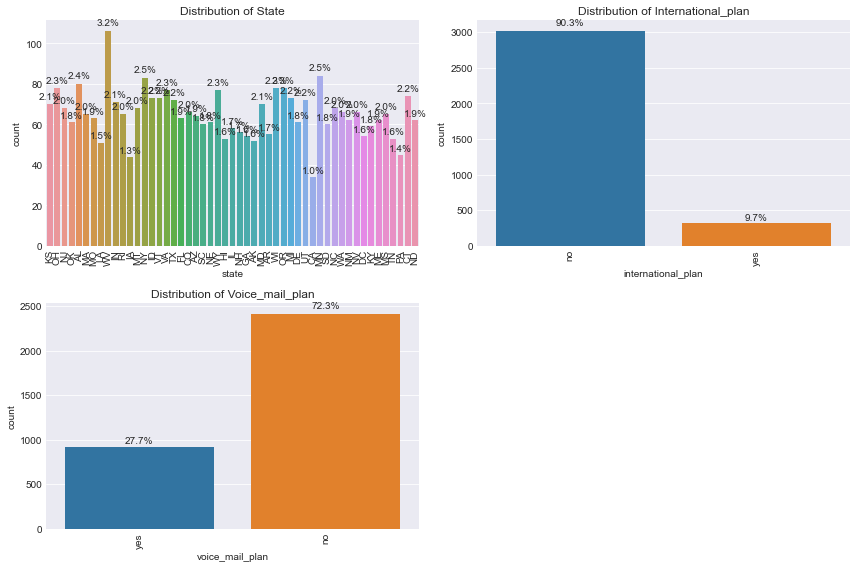

In [44]:
# Plot distributions for categorical columns
num_plots = len(categorical_columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

plt.figure(figsize=(12, num_rows * 4))

for i, column in enumerate(categorical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    ax = sns.countplot(data=telcom_data, x=column)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xticks(rotation=90)
    
    # Calculate percentages and add text annotations
    total = len(telcom_data)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02 * height, 
                f'{percentage:.1f}%', 
                ha='center', va='bottom', 
                fontsize=10)

plt.tight_layout()
plt.show()

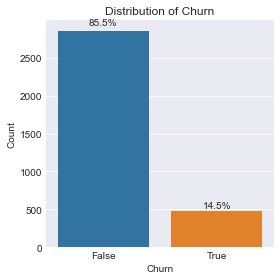

In [49]:
# Plot count distribution for the 'churn' column
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=telcom_data, x='churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Calculate percentages and add text annotations
total = len(telcom_data)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.text(p.get_x() + p.get_width() / 2., height + 0.02 * height, 
            f'{percentage:.1f}%', 
            ha='center', va='bottom', 
            fontsize=10)

plt.tight_layout()
plt.show()

As per the above majority of customers reside in West Virginia with 1.0% residing in California. More than 90% of customers do not have an international plan. About 2500 customers do not have a voice mail plan as compared to about 1000 who do. **85.5% of customers did not abandon the services offered by SyriaTel as compared to 14.5% of customers who did.** This is not bad but it is not great since 500 customers churning can result in significant losses to the company.

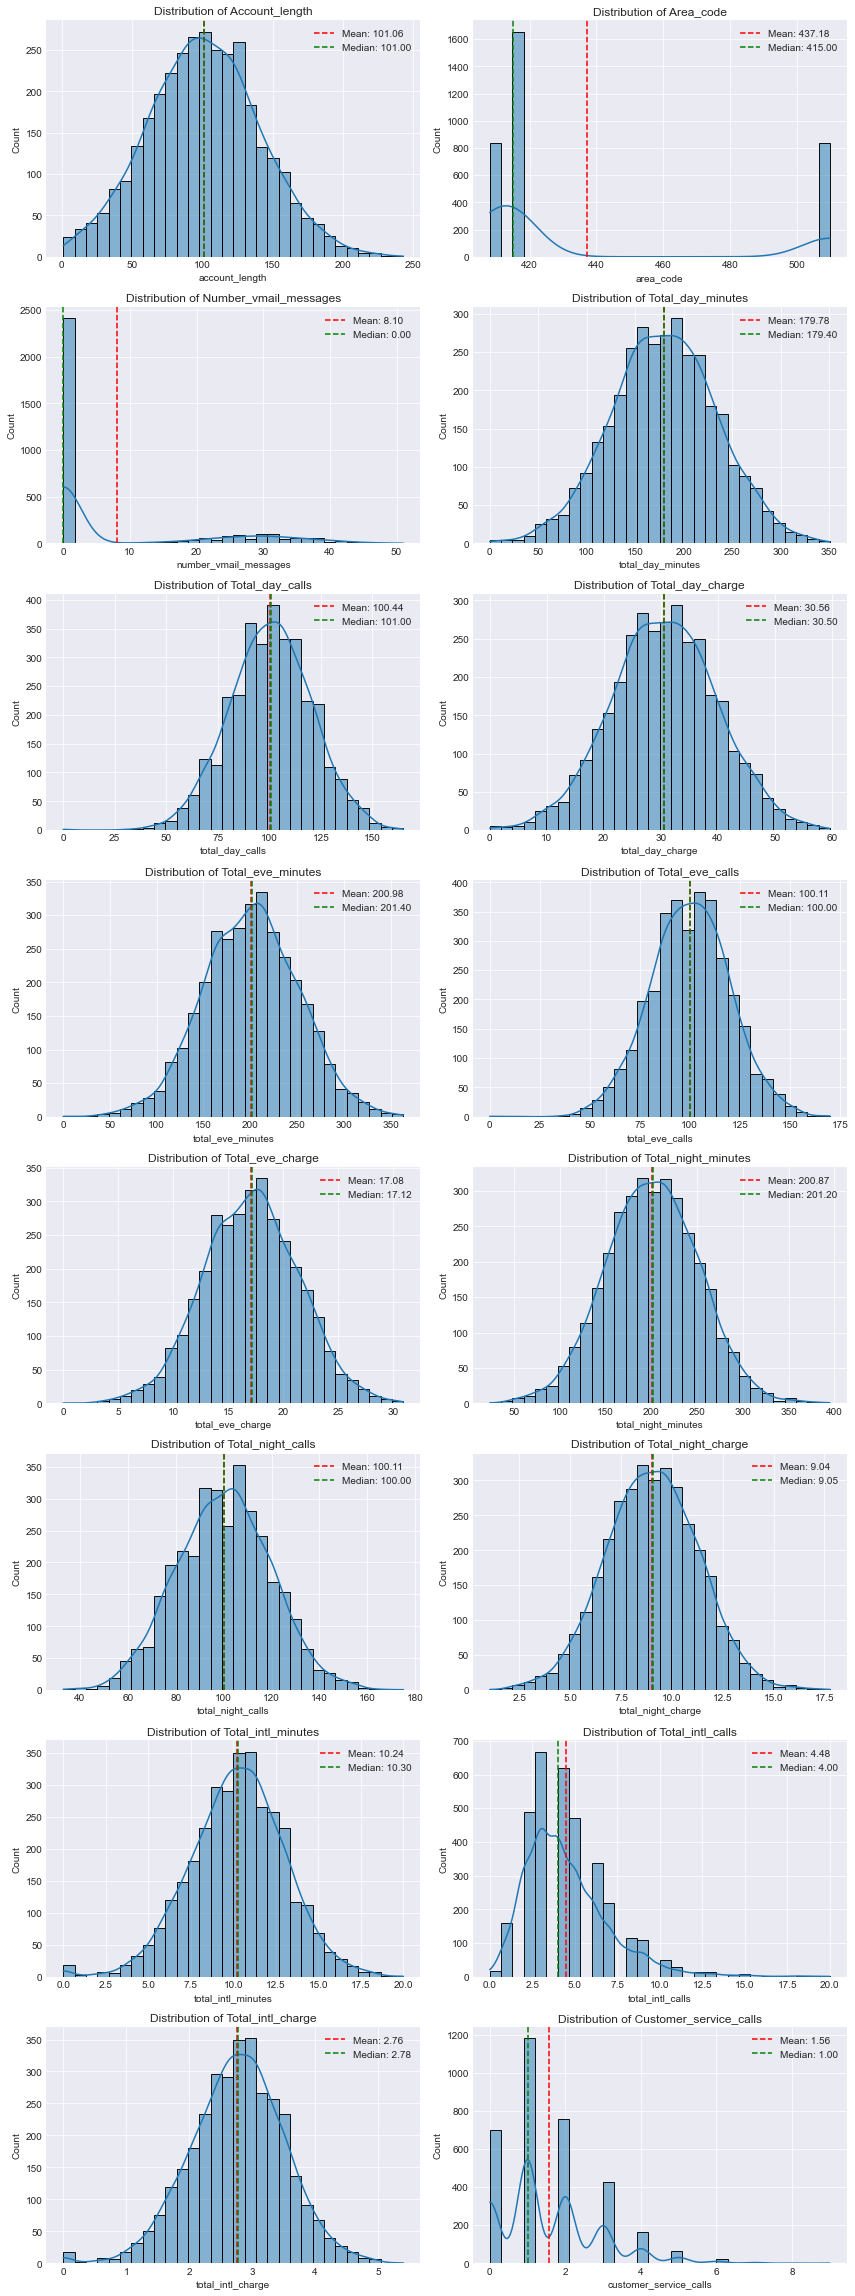

In [39]:
# Plot distributions for numerical columns
num_plots = len(numerical_columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

plt.figure(figsize=(12, num_rows * 4))

for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(telcom_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    
    # Calculate mean and median
    mean = telcom_data[column].mean()
    median = telcom_data[column].median()
    
    # Add mean and median lines
    plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='g', linestyle='--', label=f'Median: {median:.2f}')
    
    # Add legend
    plt.legend()

plt.tight_layout()
plt.show()

Majority of the numerical columns are normally distributed thus there won't be a need to transfrom these features. The total_international_calls column is left skewed however. More than 2500 customers made at least 1 customer service class, with majority making one call. Majority of customers did have any voice mail messages.

### **3.2 Bivariate Analysis**

### **3.3 Multivariate Analysis**

## **4.0 Data Preparation**

## **5.0 Modelling**

## **6.0 Evaluation**

## **Conclusion and Recommendations**